# Sentiment analysis
#### Louis Ehwerhemuepha, Tatiana Moreno, Ehsan Yaghmaei

In [0]:
import numpy as np
import pandas as pd

import re
import nltk
from nltk.stem import PorterStemmer as ps


from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers, losses
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from wordcloud import WordCloud


Using TensorFlow backend.


Retrieve Data for Sentiment Analysis from Louis' Github Repository

In [0]:
# get data from Louis' github repository
! git clone https://github.com/ehwerhemuepha/sentimentanalysis.git

Cloning into 'sentimentanalysis'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 27 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [0]:
! ls sentimentanalysis # list cwd contents

AmazonProductReviewKaggle.txt
Binary_Sentiment_Analysis_Medical_Intelligence_Summit.ipynb


In [0]:
d = pd.read_csv('sentimentanalysis/AmazonProductReviewKaggle.txt',sep='\t', encoding='ISO-8859-1', names = ['id', 'rating', 'reviewtext', 'reviewtitle'],skiprows=[0])

In [0]:
d.head()

,id,rating,reviewtext,reviewtitle
0,AVpgNzjwLJeJML43Kpxn,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AVpgNzjwLJeJML43Kpxn,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AVpgNzjwLJeJML43Kpxn,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,AVpgNzjwLJeJML43Kpxn,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,AVpgNzjwLJeJML43Kpxn,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


In [0]:
d

,id,rating,reviewtext,reviewtitle
0,AVpgNzjwLJeJML43Kpxn,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AVpgNzjwLJeJML43Kpxn,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AVpgNzjwLJeJML43Kpxn,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,AVpgNzjwLJeJML43Kpxn,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,AVpgNzjwLJeJML43Kpxn,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...
...,...,...,...,...
33327,AVqkIdZiv8e3D1O-leaJ,5,This is a great tablet for the price. Amazon i...,Good product
33328,AVqkIdZiv8e3D1O-leaJ,5,This tablet is the perfect size and so easy to...,Great Tablet
33329,AVqkIdZiv8e3D1O-leaJ,4,Purchased this for my son. Has room to upgrade...,Great for kids or smaller needs
33330,AVqkIdZiv8e3D1O-leaJ,5,I had some thoughts about getting this for a 5...,Very sturdy for a 5 year old


In [0]:
d.shape

(33332, 4)

In [0]:
# read the review texts and convert all reviews to lowercase
reviewsTitle=d['reviewtitle'].values
reviewsText=d['reviewtext'].values
reviews = [str(reviewsText[i]).lower() + ' ' + str(reviewsTitle[i]).lower() for i in range(len(reviewsTitle))]

# remove noise
reviews = [re.sub("(<.*?>)", "", elem).strip() for elem in reviews] #HTML tags
reviews = [re.sub("(\W|\d+)", " ", elem).strip() for elem in reviews] # spaces and digits

# perform stemming -- words such as (run, running, ran, runs) -> run

In [0]:

rating=[1 if elem>3 else 0 for elem in d['rating'].values] # 1 a rating of 4 or 5; 0 otherwise
rating_categorical = to_categorical(rating) # for multi-label prediction

In [0]:
min(rating), max(rating)

(0, 1)

In [0]:
reviews[0:9], rating[0:9], rating_categorical[0:9]

(['i order   of them and one of the item is bad quality  is missing backup spring so i have to put a pcs of aluminum to make the battery work        of them and one of the item is bad quality  is missing backup spring so i have',
  'bulk is always the less expensive way to go for products like these     always the less expensive way to go for products like',
  'well they are not duracell but for the price i am happy      are not duracell but for the price i am happy',
  'seem to work as well as name brand batteries at a much better price     as well as name brand batteries at a much better',
  'these batteries are very long lasting the price is great      batteries are very long lasting the price is great',
  'bought a lot of batteries for christmas and the amazonbasics cell have been good  i haven t noticed a difference between the brand name batteries and the amazon basic brand  just a lot easier to purchase and have arrive at the house and have on hand  will buy again      batteries

In [0]:
# optionally perform stemming -- improved accuracy though somewhat imperfect

stemmer = ps()
def stemlist(word_list):
  return ' '.join([stemmer.stem(word=word) for word in word_list.split()])

reviews = [stemlist(elem) for elem in reviews]
  

In [0]:
d.shape, len(reviews), len(rating)

((33332, 4), 33332, 33332)

In [0]:
reviews[0:9], rating[0:9], rating_categorical[0:9]

(['i order   of them and one of the item is bad quality  is missing backup spring so i have to put a pcs of aluminum to make the battery work        of them and one of the item is bad quality  is missing backup spring so i have',
  'bulk is always the less expensive way to go for products like these     always the less expensive way to go for products like',
  'well they are not duracell but for the price i am happy      are not duracell but for the price i am happy',
  'seem to work as well as name brand batteries at a much better price     as well as name brand batteries at a much better',
  'these batteries are very long lasting the price is great      batteries are very long lasting the price is great',
  'bought a lot of batteries for christmas and the amazonbasics cell have been good  i haven t noticed a difference between the brand name batteries and the amazon basic brand  just a lot easier to purchase and have arrive at the house and have on hand  will buy again      batteries

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
reviews[0]

'i order   of them and one of the item is bad quality  is missing backup spring so i have to put a pcs of aluminum to make the battery work        of them and one of the item is bad quality  is missing backup spring so i have'

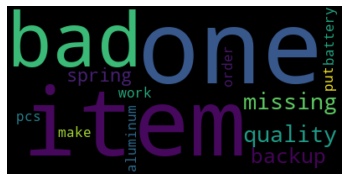

In [0]:
# Start with one review:
text = reviews[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

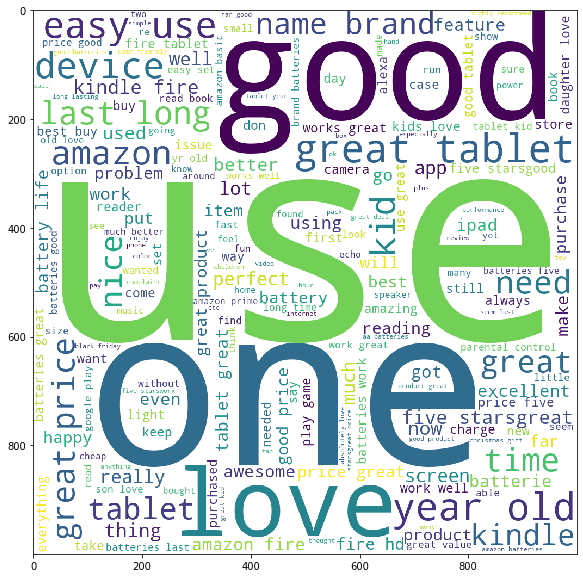

In [0]:
# Word frequencies via wordcloud

complete_text = ''
for elem in reviews:
  complete_text += elem
  
import matplotlib.pyplot as plt
%matplotlib inline

wc = WordCloud(max_words=200, height = 1000, width = 1000, 
              background_color = 'white').generate(complete_text)
fig = plt.figure(1, figsize=(10,10))

plt.imshow(wc)
plt.show()
# complete_text=''

Split your data into training and test set 

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(reviews, rating_categorical, test_size=0.20, random_state=727)

In [0]:
xtrain[0:4], ytrain[0:4]

(['i like it four stars',
  'i definitely recommend this tablet is so perfect for children  good tablet',
  'less expensive than last year with so many more features and bigger screen  great buy',
  'good and cheap  five stars'],
 array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32))

Tokenization

Tokenization is the breaking up of sentences into tokens 

In [0]:
tokenizer = Tokenizer(num_words=2000) # get a count of all tokens and use the 1000 most common only
tokenizer.fit_on_texts(xtrain)
xtrain = tokenizer.texts_to_sequences(xtrain)
xtest = tokenizer.texts_to_sequences(xtest)
vocab_size = len(tokenizer.word_index) + 1 # plus index 0

In [0]:
xtrain[0], xtest[0], vocab_size


([2, 50, 5, 191, 36],
 [84, 318, 8, 18, 3, 911, 19, 164, 336, 8, 18, 3, 911, 19, 164, 336],
 10169)

In [0]:
len(xtrain) , len(xtest), len(xtrain) + len(xtest)

(26665, 6667, 33332)

In [0]:
list(tokenizer.word_counts.items())[0:19], len(tokenizer.word_counts) # tokens and token frequencies

([('i', 23304),
  ('like', 2683),
  ('it', 21227),
  ('four', 589),
  ('stars', 4072),
  ('definitely', 471),
  ('recommend', 1127),
  ('this', 10815),
  ('tablet', 10505),
  ('is', 11944),
  ('so', 4921),
  ('perfect', 1599),
  ('for', 22521),
  ('children', 590),
  ('good', 8060),
  ('less', 463),
  ('expensive', 453),
  ('than', 2187),
  ('last', 2130)],
 10168)

Pad in order to ensure that all sequences have the same length


In [0]:
maxlen = 100 # assumes the first 100 words are the most important in the review (especially in good ones) and that most review may have less than 50 workds == adjust too see effect on accuracy if any
xtrain = pad_sequences(xtrain, padding='pre', maxlen=maxlen) 
xtest = pad_sequences(xtest, padding='pre', maxlen=maxlen)

In [0]:
xtrain[0], xtest[0]

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   2,  50,   5, 191,  36], dtype=int32),
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0

[Recurrent Neural Network Cheat Sheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks#architecture)

Build model and get model performance 

In [0]:
# RNN model
rnnmodel = Sequential()
rnnmodel.add(layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=maxlen))
# rnnmodel.add(layers.Embedding(50, 10))
rnnmodel.add(layers.SimpleRNN(units=50))
rnnmodel.add(layers.Dense(2, activation='softmax'))
rnnmodel.compile(optimizer='adam',
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])
rnnmodel.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           508450    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 513,602
Trainable params: 513,602
Non-trainable params: 0
_________________________________________________________________


In [0]:
epochs = 20
batch_size = 256

rnnmodel.fit(xtrain, ytrain, epochs=epochs, batch_size=batch_size)
loss, accuracy = rnnmodel.evaluate(xtrain, ytrain)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = rnnmodel.evaluate(xtest, ytest)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





26665/26665 [==============================] - 13s 500us/step - loss: 0.2724 - acc: 0.9117
Epoch 2/20
26665/26665 [==============================] - 9s 324us/step - loss: 0.1092 - acc: 0.9630
Epoch 3/20
26665/26665 [==============================] - 9s 322us/step - loss: 0.0593 - acc: 0.9821
Epoch 4/20
26665/26665 [==============================] - 9s 324us/step - loss: 0.0285 - acc: 0.9930
Epoch 5/20
26665/26665 [==============================] - 9s 330us/step - loss: 0.0148 - acc: 0.9971
Epoch 6/20
26665/26665 [==============================] - 9s 333us/step - loss: 0.0105 - acc: 0.9979
Epoch 7/20
26665/26665 [==============================] - 9s 331us/step - loss: 0.0058 - acc: 0.9990
Epoch 8/20
26665/26665 [==============================] - 9s 325us/step - loss: 0.0038 - acc: 0.9994
Epoch 9/20
26665/26665 [==============================] - 9s 329us/step - loss: 0.0027 - 

In [0]:
# GRU model
grumodel = Sequential()
grumodel.add(layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=maxlen))
grumodel.add(layers.GRU(units=50))
grumodel.add(layers.Dense(2, activation='softmax'))
grumodel.compile(optimizer='adam',
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])
grumodel.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           508450    
_________________________________________________________________
gru_1 (GRU)                  (None, 50)                15150     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 523,702
Trainable params: 523,702
Non-trainable params: 0
_________________________________________________________________


In [0]:
grumodel.fit(xtrain, ytrain, epochs=epochs, batch_size=batch_size)
loss, accuracy = grumodel.evaluate(xtrain, ytrain, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = grumodel.evaluate(xtest, ytest, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
26665/26665 [==============================] - 20s 740us/step - loss: 0.2824 - acc: 0.9125
Epoch 2/20
26665/26665 [==============================] - 19s 714us/step - loss: 0.1183 - acc: 0.9586
Epoch 3/20
26665/26665 [==============================] - 19s 710us/step - loss: 0.0957 - acc: 0.9670
Epoch 4/20
26665/26665 [==============================] - 19s 716us/step - loss: 0.0838 - acc: 0.9706
Epoch 5/20
26665/26665 [==============================] - 19s 713us/step - loss: 0.0717 - acc: 0.9751
Epoch 6/20
26665/26665 [==============================] - 19s 716us/step - loss: 0.0669 - acc: 0.9775
Epoch 7/20
26665/26665 [==============================] - 19s 708us/step - loss: 0.0602 - acc: 0.9809
Epoch 8/20
26665/26665 [==============================] - 19s 705us/step - loss: 0.0571 - acc: 0.9811
Epoch 9/20
26665/26665 [==============================] - 19s 708us/step - loss: 0.0513 - acc: 0.9841
Epoch 10/20
26665/26665 [==============================] - 19s 713us/step - loss: 

In [0]:
# LSTM model
lstm_model = Sequential()
lstm_model.add(layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=maxlen))
lstm_model.add(layers.LSTM(units=50))
lstm_model.add(layers.Dense(2, activation='softmax'))
lstm_model.compile(optimizer='adam',
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])
lstm_model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           508450    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 528,752
Trainable params: 528,752
Non-trainable params: 0
_________________________________________________________________


In [0]:
lstm_model.fit(xtrain, ytrain, epochs=epochs, batch_size=batch_size)
loss, accuracy = lstm_model.evaluate(xtrain, ytrain, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = lstm_model.evaluate(xtest, ytest, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
26665/26665 [==============================] - 23s 845us/step - loss: 0.2951 - acc: 0.9090
Epoch 2/20
26665/26665 [==============================] - 21s 802us/step - loss: 0.1215 - acc: 0.9564
Epoch 3/20
26665/26665 [==============================] - 21s 803us/step - loss: 0.0918 - acc: 0.9682
Epoch 4/20
26665/26665 [==============================] - 21s 800us/step - loss: 0.0779 - acc: 0.9736
Epoch 5/20
26665/26665 [==============================] - 21s 800us/step - loss: 0.0666 - acc: 0.9781
Epoch 6/20
26665/26665 [==============================] - 21s 800us/step - loss: 0.0573 - acc: 0.9814
Epoch 7/20
26665/26665 [==============================] - 21s 802us/step - loss: 0.0512 - acc: 0.9842
Epoch 8/20
26665/26665 [==============================] - 21s 793us/step - loss: 0.0438 - acc: 0.9870
Epoch 9/20
26665/26665 [==============================] - 22s 809us/step - loss: 0.0362 - acc: 0.9900
Epoch 10/20
26665/26665 [==============================] - 22s 808us/step - loss: 